In [10]:
import numpy as np
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import Sampler

# Sampler primitive (required for Qiskit ML 1.x)
sampler = Sampler()

# Feature map & ansatz
feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = TwoLocal(num_qubits=2, rotation_blocks="ry", entanglement="cz", reps=1)

# NumPy arrays required
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# VQC
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=100),
    sampler=sampler
)

# Train
vqc.fit(X, y)

# Predict
preds = vqc.predict(X)
print("Predictions:", preds)


C:\Users\DELL\AppData\Local\Temp\ipykernel_9320\1662515970.py:8: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Predictions: [0 0 1 0]


C:\Users\DELL\AppData\Local\Temp\ipykernel_9320\1729987945.py:15: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Predictions: [0 0 1 0]


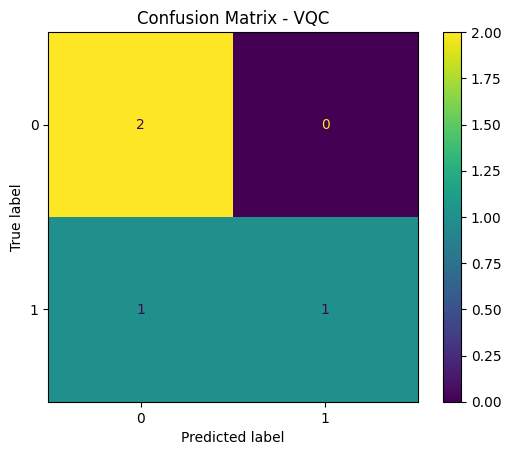

In [11]:
import numpy as np
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import Sampler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -------------------------
# Quantum Model
# -------------------------

# Sampler primitive (required in Qiskit ML 1.x)
sampler = Sampler()

# Feature map & ansatz
feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = TwoLocal(num_qubits=2, rotation_blocks="ry", entanglement="cz", reps=1)

# NumPy arrays required
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# VQC model
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=100),
    sampler=sampler
)

# Train
vqc.fit(X, y)

# Predict
preds = vqc.predict(X)
print("Predictions:", preds)

# -------------------------
# Confusion Matrix
# -------------------------

cm = confusion_matrix(y, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("Confusion Matrix - VQC")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9320\447948669.py:29: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Test predictions: [0 0]
Accuracy:  0.500
Precision: 0.000
Recall:    0.000


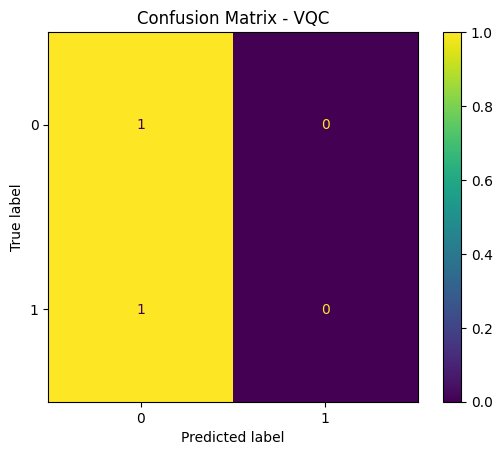

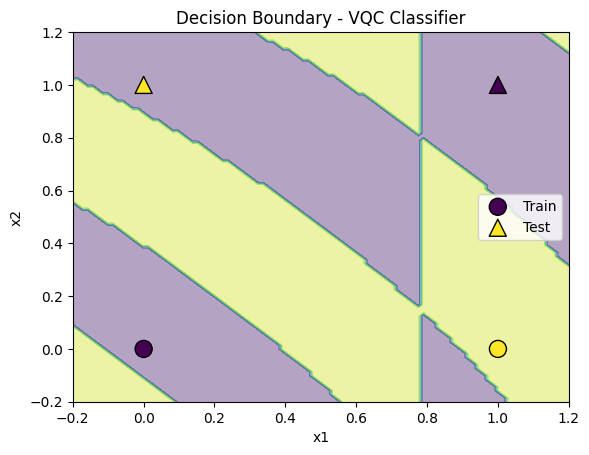

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)

from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import Sampler

# -------------------------
# DATA (XOR problem)
# -------------------------
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# -------------------------
# QUANTUM CLASSIFIER (VQC)
# -------------------------
sampler = Sampler()

feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = TwoLocal(num_qubits=2, rotation_blocks="ry", entanglement="cz", reps=1)

vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=200),
    sampler=sampler
)

# Train
vqc.fit(X_train, y_train)

# Predict
y_pred = vqc.predict(X_test)

print("Test predictions:", y_pred)

# -------------------------
# METRICS
# -------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")

# -------------------------
# CONFUSION MATRIX
# -------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("Confusion Matrix - VQC")
plt.show()

# -------------------------
# DECISION BOUNDARY PLOT
# -------------------------
# Grid of points in feature space
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 100),
    np.linspace(-0.2, 1.2, 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on grid (flatten → reshape)
grid_pred = vqc.predict(grid)
Z = grid_pred.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=150, edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=150, marker='^', edgecolor='k', label='Test')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Decision Boundary - VQC Classifier")
plt.show()


No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Predictions: [0 0]
Accuracy:  0.500
Precision: 0.000
Recall:    0.000


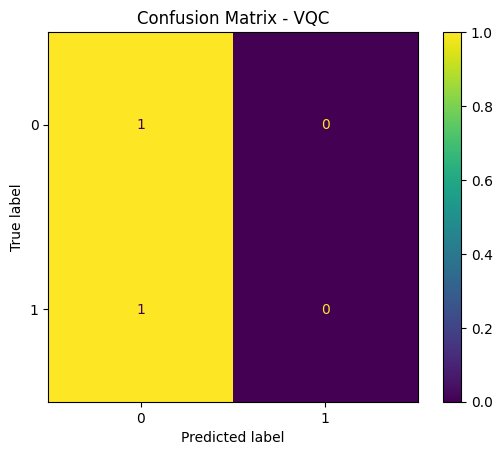

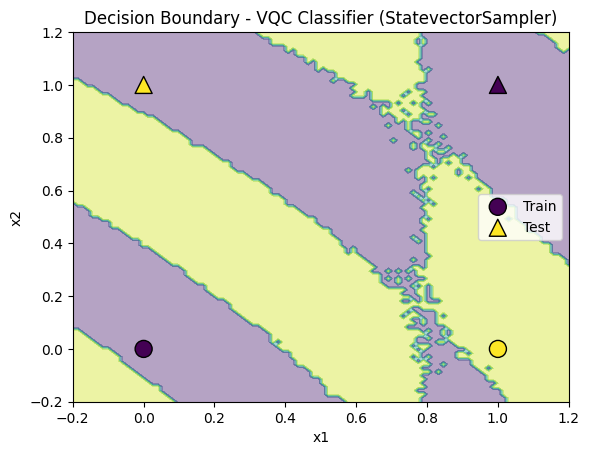

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)

from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA

# ✔️ New primitive (replaces deprecated Sampler)
from qiskit.primitives import StatevectorSampler

# -------------------------
# DATA (XOR)
# -------------------------
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# -------------------------
# VQC MODEL
# -------------------------
sampler = StatevectorSampler()   # ← NEW, recommended in Qiskit 1.4.x+

feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = TwoLocal(num_qubits=2, rotation_blocks="ry", entanglement="cz", reps=1)

vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=200),
    sampler=sampler
)

# Train
vqc.fit(X_train, y_train)

# Predict
y_pred = vqc.predict(X_test)
print("Predictions:", y_pred)

# -------------------------
# METRICS
# -------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")

# -------------------------
# CONFUSION MATRIX
# -------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - VQC")
plt.show()

# -------------------------
# DECISION BOUNDARY
# -------------------------
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 100),
    np.linspace(-0.2, 1.2, 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_pred = vqc.predict(grid)
Z = grid_pred.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=150, edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=150, marker='^', edgecolor='k', label='Test')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Decision Boundary - VQC Classifier (StatevectorSampler)")
plt.show()


In [ ]:
#pip install qiskit-algorithms

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Predictions: [0 0]
Accuracy: 0.5
Precision: 0.0
Recall: 0.0


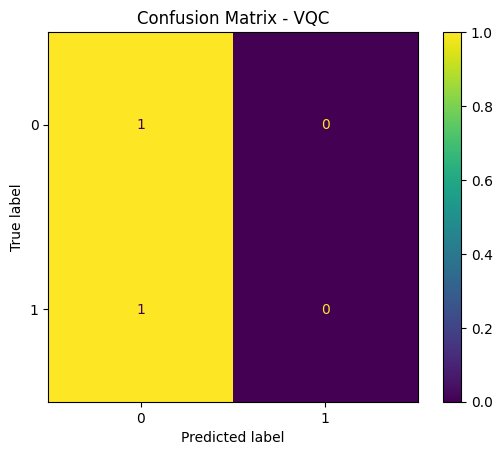

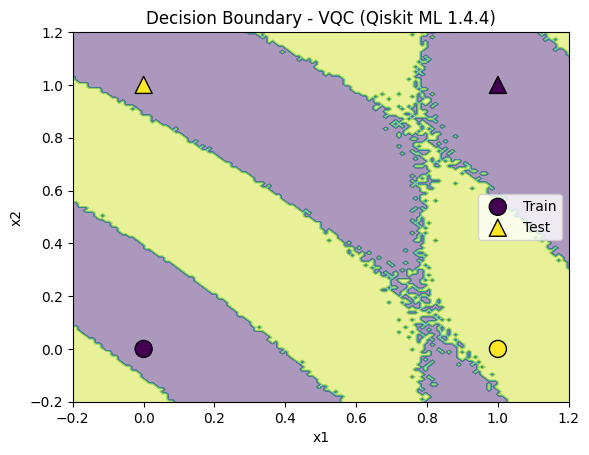

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)

from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.primitives import StatevectorSampler

# -----------------------
# DATA (XOR)
# -----------------------
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=float)
y = np.array([0, 1, 1, 0])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# -----------------------
# VQC SETUP
# -----------------------
sampler = StatevectorSampler()

feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = TwoLocal(
    num_qubits=2,
    rotation_blocks="ry",
    entanglement="cz",
    reps=1
)

vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=200),
    sampler=sampler
)

# -----------------------
# TRAIN
# -----------------------
vqc.fit(X_train, y_train)

# -----------------------
# PREDICT
# -----------------------
y_pred = vqc.predict(X_test)
print("Predictions:", y_pred)

# -----------------------
# METRICS
# -----------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))

# -----------------------
# CONFUSION MATRIX
# -----------------------
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - VQC")
plt.show()

# -----------------------
# DECISION BOUNDARY
# -----------------------
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 150),
    np.linspace(-0.2, 1.2, 150)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = vqc.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.45)
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, s=150, edgecolor="k", label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_test, s=150, marker="^", edgecolor="k", label="Test")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary - VQC (Qiskit ML 1.4.4)")
plt.legend()
plt.show()


No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Predictions: [0 0]
Accuracy: 0.5
Precision: 0.0
Recall: 0.0


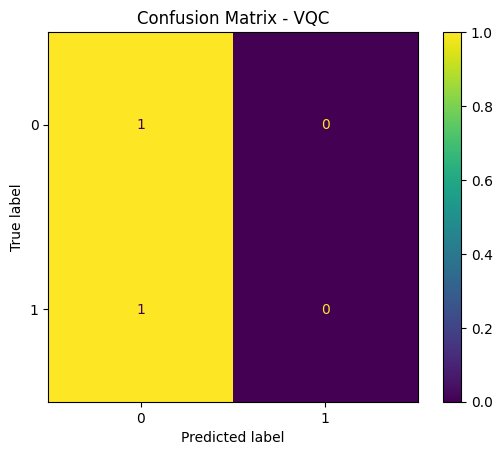

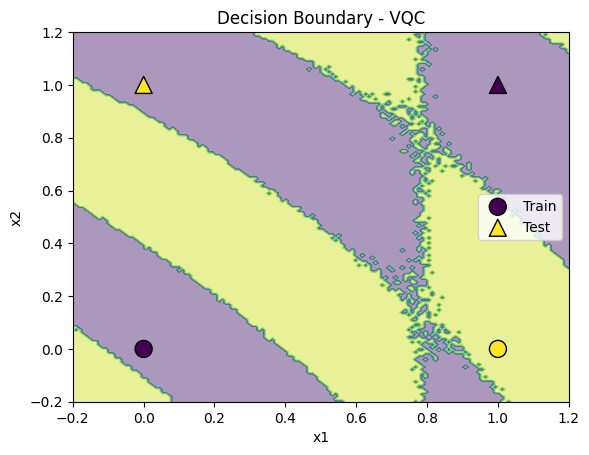

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)

from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.primitives import StatevectorSampler

# --------------------------------------------------
# DATA (XOR)
# --------------------------------------------------
X = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=float)
y = np.array([0,1,1,0])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# --------------------------------------------------
# VQC MODEL
# --------------------------------------------------
sampler = StatevectorSampler()

feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = TwoLocal(num_qubits=2, rotation_blocks="ry", entanglement="cz", reps=1)

vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=200),
    sampler=sampler
)

# Train
vqc.fit(X_train, y_train)

# Predict
y_pred = vqc.predict(X_test)
print("Predictions:", y_pred)

# --------------------------------------------------
# METRICS
# --------------------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))

# --------------------------------------------------
# CONFUSION MATRIX
# --------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - VQC")
plt.show()

# --------------------------------------------------
# DECISION BOUNDARY
# --------------------------------------------------
xx, yy = np.meshgrid(
    np.linspace(-0.2, 1.2, 150),
    np.linspace(-0.2, 1.2, 150)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = vqc.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.45)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=150, edgecolor='k', label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=150, marker='^', edgecolor='k', label="Test")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary - VQC")
plt.legend()
plt.show()


No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Accuracy : 0.6222222222222222
Precision: 1.0
Recall   : 0.10526315789473684


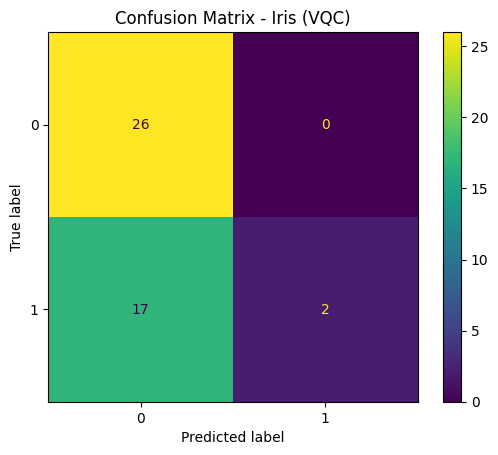

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)

from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.primitives import StatevectorSampler

# ------------------------
# LOAD REAL DATASET
# ------------------------
iris = load_iris()
X = iris.data[:, :2]          # take 2 features (sepal length, width)
y = iris.target

# Binary classification (setosa vs non-setosa)
y = (y == 0).astype(int)

# Scale features to [0,1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ------------------------
# VQC MODEL
# ------------------------
sampler = StatevectorSampler()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
ansatz = TwoLocal(2, 'ry', 'cz', reps=2)

vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=300),
    sampler=sampler
)

# Train
vqc.fit(X_train, y_train)

# Predict
y_pred = vqc.predict(X_test)

# ------------------------
# METRICS
# ------------------------
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))

# ------------------------
# CONFUSION MATRIX
# ------------------------
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - Iris (VQC)")
plt.show()
